In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
line_symbols = ["-o", "-*", "-v", "-p", "-D"]
marker_symbols = ["o", "*", "v", "p", "D"]

In [2]:
def read_summary(filename):
    with open(filename, "r") as f:
        d = {"L":[], "p":[], "perc_prob": [], "perc_prob_variance":[]}
        lines = f.readlines()
        for line in lines:
            s = line.split()
            values = s[1::2]
            d["L"].append(int(values[0]))
            d["p"].append(float(values[1]))
            d["perc_prob"].append(float(values[2]))
            d["perc_prob_variance"].append(float(values[3]))
        df = pd.DataFrame.from_dict(d)
        df = df.sort_values('L')
        return df

df_2d = read_summary("sum_2d/2d.txt")
df_3d = read_summary("sum_3d/3d.txt")

Text(0, 0.5, '$P_L(p)$')

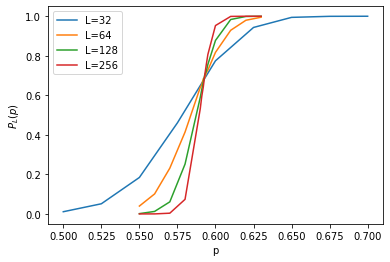

In [3]:
fig, ax = plt.subplots()
Ls = [32, 64, 128, 256]

for L in Ls:
    df = df_2d[df_2d["L"] == L]
    df = df.sort_values("p")

    p = df["p"]
    P = df["perc_prob"]
    ax.plot(p, P, label=f"L={L}")
ax.legend()
ax.set_xlabel("p")
ax.set_ylabel("$P_L(p)$")

Text(0, 0.5, '$P_L(p)$')

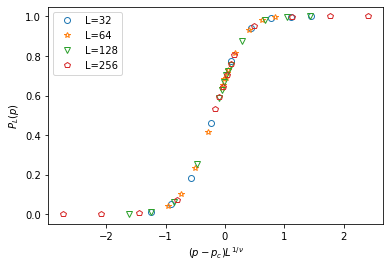

In [4]:
fig, ax = plt.subplots()

p_c = 0.5925
v = 4/3
for marker, L in zip(marker_symbols, Ls):
    df = df_2d[df_2d["L"] == L]
    df = df.sort_values("p")

    p = df["p"]
    P = df["perc_prob"]

    x = (p-p_c)*np.power(L, 1/v)
    ax.plot(x, P, marker, fillstyle="none", label=f"L={L}")
ax.legend()
ax.set_xlabel(r"$(p-p_c)L^{1/\nu}$")
ax.set_ylabel("$P_L(p)$")

(0.3, 0.32)

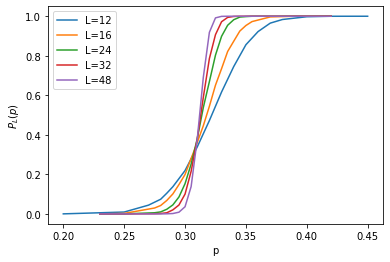

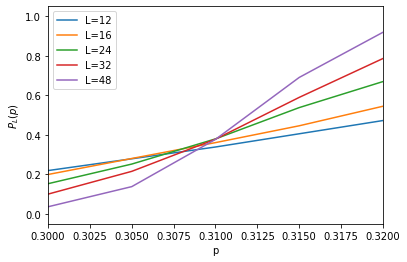

In [13]:
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
Ls = [12, 16, 24, 32, 48]

for L in Ls:
    df = df_3d[df_3d["L"] == L]
    df = df.sort_values("p")

    p = df["p"]
    P = df["perc_prob"]
    ax.plot(p, P, label=f"L={L}")
    ax1.plot(p, P, label=f"L={L}")
ax.legend()
ax.set_xlabel("p")
ax.set_ylabel("$P_L(p)$")

ax1.legend()
ax1.set_xlabel("p")
ax1.set_ylabel("$P_L(p)$")
ax1.set_xlim([0.30, 0.32])

Text(0, 0.5, '$P_L(p)$')

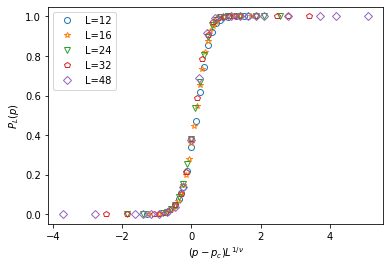

In [10]:
fig, ax = plt.subplots()

p_c = 0.31
v = 1.01
for marker, L in zip(marker_symbols, Ls):
    df = df_3d[df_3d["L"] == L]
    df = df.sort_values("p")

    p = df["p"]
    P = df["perc_prob"]

    x = (p-p_c)*np.power(L, 1/v)
    ax.plot(x, P, marker, fillstyle="none", label=f"L={L}")
ax.legend()
ax.set_xlabel(r"$(p-p_c)L^{1/\nu}$")
ax.set_ylabel("$P_L(p)$")